In [1]:
import os
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.ensemble import EasyEnsembleClassifier

from Dataset_Construction import Balance_Ratio 
from Sampling import label_divide
from AdaClassifier import train_set, multiple_set, print_badC, bad_plot, line_chart, cf_matrix
from Aging_Score import score1

os.chdir('C:/Users/Darui Yen/OneDrive/桌面/data_after_mid') 
os.getcwd()

'C:\\Users\\Darui Yen\\OneDrive\\桌面\\data_after_mid'

### Ensemble model

In [16]:
def EasyEnsembleC(train_x, test_x, train_y, test_y, n_estimator = 10, proportion = 0.6):

    clf = EasyEnsembleClassifier(n_estimators = n_estimator, sampling_strategy = proportion)
    clf.fit(train_x, train_y)
    predict_y = clf.predict(test_x)
    result = pd.DataFrame({'truth': test_y, 'predict': predict_y})
    
    return result

In [12]:
def runall_EasyEnsembleC(num_set, trainset_x, test_x, trainset_y, test_y, record_bad = True):
    
    table_set = pd.DataFrame()
    bad_set = pd.DataFrame()

    for i in range(num_set):
        print('\n', f'Dataset {i}:')
        
        result = EasyEnsembleC(trainset_x[f'set{i}'], test_x, trainset_y[f'set{i}'], test_y)
        table = cf_matrix(result, trainset_y[f'set{i}'])
        table_set = pd.concat([table_set, table]).rename(index = {0: f'dataset {i}'})
        
        if record_bad:
            bad_table = print_badC(result, test_x, Bad_Types) 
            bad_set = pd.concat([bad_set, bad_table]).rename(index = {0: f'dataset {i}'})

    if record_bad:
        return table_set, bad_set
    else:
        return table_set

## Data Processing

In [3]:
###bad types###
bad = pd.read_csv('original_data/Bad_Types.csv').iloc[:, 1:]
Bad_Types = {bad.cb[i]:i for i in range (len(bad))}
print('Total bad types:', len(bad))

###single dataset###
test = pd.read_csv('original_data/TestingSet_0.csv').iloc[:, 2:]
train = pd.read_csv('original_data/TrainingSet_new.csv').iloc[:, 2:]
print('\ntraining data:', train.shape, '\nBalance Ratio:', Balance_Ratio(train))
print('\ntesting data:', test.shape, '\nBalance Ratio:', Balance_Ratio(test))

train_x, train_y, test_x, test_y = label_divide(train, test, 'GB')

###multiple dataset###
data_dict = multiple_set(num_set = 9)
trainset_x, trainset_y = train_set(data_dict, num_set = 9, label = 'GB')
test_x, test_y = label_divide(test, None, 'GB', train_only = True)

Total bad types: 62

training data: (77138, 83) 
Balance Ratio: 18.17902

testing data: (55903, 83) 
Balance Ratio: 3104.72222
Dimension of dataset 0 : (77138, 83)  balance ratio: 18.17902
Dimension of dataset 1 : (111685, 83)  balance ratio: 1.89572
Dimension of dataset 2 : (111685, 83)  balance ratio: 1.89572
Dimension of dataset 3 : (111685, 83)  balance ratio: 1.89572
Dimension of dataset 4 : (109674, 83)  balance ratio: 2.0
Dimension of dataset 5 : (32176, 83)  balance ratio: 1.66667
Dimension of dataset 6 : (32176, 83)  balance ratio: 1.66667
Dimension of dataset 7 : (32176, 83)  balance ratio: 1.66667
Dimension of dataset 8 : (30165, 83)  balance ratio: 2.0

 9 datasets are loaded.

Labels of  9 datasets are divided.



 Dataset 0:
Precision: 0.00047607712449416806 
Recall: 0.1111111111111111 
Aging Rate: 0.0751480242563011
Types of Bad found: [22, 33]
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 23, 39, 40, 42, 45, 48, 49]

 Dataset 1:
Precision: 0.00037900322152738296 
Recall: 0.1111111111111111 
Aging Rate: 0.0943956496073556
Types of Bad found: [22, 33]
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 23, 39, 40, 42, 45, 48, 49]

 Dataset 2:
Precision: 0.00037313432835820896 
Recall: 0.1111111111111111 
Aging Rate: 0.09588036420227895
Types of Bad found: [22, 33]
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 23, 39, 40, 42, 45, 48, 49]

 Dataset 3:
Precision: 0.0 
Recall: 0.0 
Aging Rate: 0.0023791209774072946
Types of Bad found: []
Types of Bad not found: [2, 2, 4, 5, 6, 7, 11, 15, 17, 22, 23, 33, 39, 40, 42, 45, 48, 49]

 Dataset 4:
Precision: 0.0003699593044765076 
Recall: 0.1111111111111111 
Aging Rate: 0.09670321807416418
Types of Bad found: [22, 33]
Types of Bad not

C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Darui Yen\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


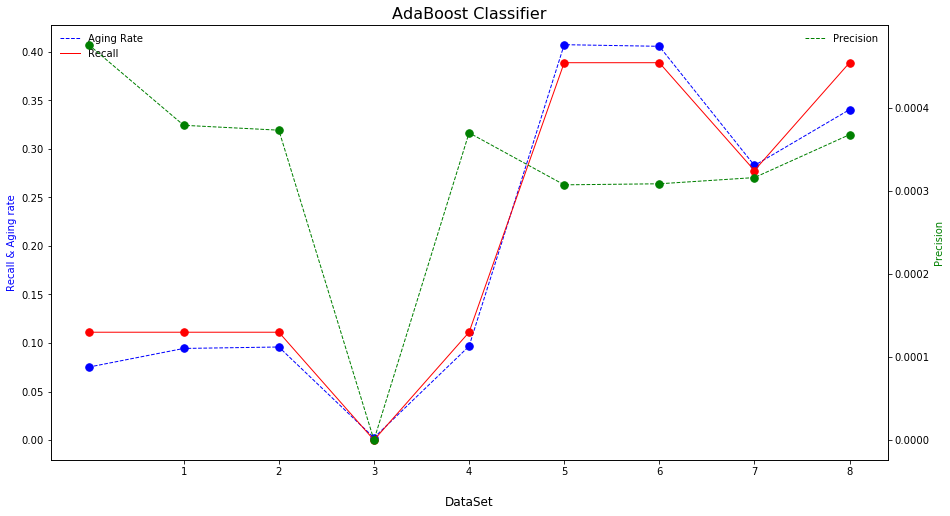

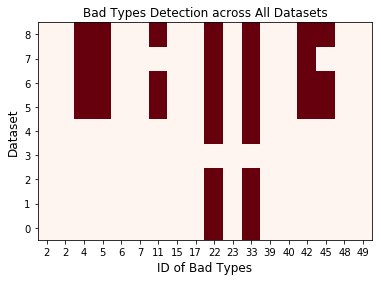


Run Time：2027.643335 seconds


In [17]:
start = time.time()

table_set, bad_set = runall_EasyEnsembleC(9, trainset_x, test_x, trainset_y, test_y)
line_chart(table_set)
bad_plot(bad_set)

end = time.time()
print("\nRun Time：%f seconds" % (end - start))

In [19]:
table_set

,Balance Ratio,Train_OK,Train_NG,TP,FP,FN,TN,Precision,Recall,Aging Rate,Efficiency,Score
dataset 0,18.179015,73116.0,4022.0,2.0,4199.0,16.0,51686.0,0.000476,0.111111,0.075148,1.478563,0.100853
dataset 1,1.895719,73116.0,38569.0,2.0,5275.0,16.0,50610.0,0.000379,0.111111,0.094396,1.177079,0.086443
dataset 2,1.895719,73116.0,38569.0,2.0,5358.0,16.0,50527.0,0.000373,0.111111,0.095880,1.158852,0.085508
dataset 3,1.895719,73116.0,38569.0,0.0,133.0,18.0,55752.0,0.000000,0.000000,0.002379,0.000000,0.000000
dataset 4,2.000000,73116.0,36558.0,2.0,5404.0,16.0,50481.0,0.000370,0.111111,0.096703,1.148991,0.085000
dataset 5,1.666667,20110.0,12066.0,7.0,22771.0,11.0,33114.0,0.000307,0.388889,0.407456,0.954432,0.000000
dataset 6,1.666667,20110.0,12066.0,7.0,22678.0,11.0,33207.0,0.000309,0.388889,0.405792,0.958345,0.000000
dataset 7,1.666667,20110.0,12066.0,5.0,15816.0,13.0,40069.0,0.000316,0.277778,0.283008,0.981519,0.000000
dataset 8,2.000000,20110.0,10055.0,7.0,19029.0,11.0,36856.0,0.000368,0.388889,0.340518,1.142050,0.296241
